![header](../figures/logos_partenaires._cmems_se.jpg)

# Evaluate Projection method on Nadir tracks

<div style="text-align: right"><i> 2023-01-19 evaluation_onnadirs_Projmethod </i></div>

***
**Authors:**  Datlas, IGE, IMT-Atlantique & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMT-Atlantique & CLS <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center>Evaluate Projection method calibration on Nadir tracks </center></h1></div>

In [1]:
import os
import glob
import sys
import numpy as np
sys.path.append('..')
from src.swot import * 
from src.eval_on_nadirtrack import * 
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-info" role="alert">

<h2>1. Downloading the Nadir satellite data for evaluations </h2>

</div>

In [2]:
# Check if inputs have already been downloaded otherwise do
if len(os.listdir('../inputs/dc_SWOTcalibGS_inputs/'))<2:
    # Get pseuso-observation
    print('Downloading and unzipping inputs')
    !wget https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/ocean-data-challenges/2022c_SWOT_error_calibration_GS/dc_SWOTcalibGS_inputs.tar.gz
    !tar -xvf dc_SWOTcalibGS_inputs.tar.gz dc_SWOTcalibGS_inputs    
    !mv dc_SWOTcalibGS_inputs  ../inputs/    
    !rm dc_SWOTcalibGS_inputs.tar.gz 

# Check if nadir satellite data have already been downloaded otherwise do
if len(os.listdir('../inputs/dc_SWOTcalibGS_nadirs/'))<2:
    # Get pseuso-observation
    print('Downloading and unzipping inputs')
    !wget https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/ocean-data-challenges/2022c_SWOT_error_calibration_GS/dc_SWOTcalibGS_nadirs.tar.gz
    !tar -xvf dc_SWOTcalibGS_nadirs.tar.gz dc_SWOTcalibGS_nadirs    
    !mv dc_SWOTcalibGS_nadirs  ../inputs/    
    !rm dc_SWOTcalibGS_nadirs.tar.gz 

In [3]:
sats = ['../inputs/dc_SWOTcalibGS_nadirs/dc_SWOTcalibGS_jason1.nc',
        '../inputs/dc_SWOTcalibGS_nadirs/dc_SWOTcalibGS_envisat.nc',
        '../inputs/dc_SWOTcalibGS_nadirs/dc_SWOTcalibGS_geosat2.nc',
        '../inputs/dc_SWOTcalibGS_nadirs/dc_SWOTcalibGS_topexposeidon.nc'
       ]


<div class="alert alert-info" role="alert">

<h2>2. Interpolating SWOT input data </h2>

</div>

# Interpolating input data

In [4]:
dir_of_swottracks = '../inputs/dc_SWOTcalibGS_inputs/'
swottracks_type = 'inputs' 
nremoval = 2
  
lonalong, latalong, timealong, refalong, x_acalong, sshalong_true, sshalong_err = interp_swot2nadir(sats, dir_of_swottracks, swottracks_type, nremoval,ref_nadir='model')


dc_SWOTcalibGS_input_pass02.nc
dc_SWOTcalibGS_input_pass03.nc
dc_SWOTcalibGS_input_pass04.nc
dc_SWOTcalibGS_input_pass05.nc
dc_SWOTcalibGS_input_pass06.nc
dc_SWOTcalibGS_input_pass07.nc
dc_SWOTcalibGS_input_pass12.nc
dc_SWOTcalibGS_input_pass13.nc
dc_SWOTcalibGS_input_pass14.nc
dc_SWOTcalibGS_input_pass15.nc
dc_SWOTcalibGS_input_pass16.nc
dc_SWOTcalibGS_input_pass17.nc
dc_SWOTcalibGS_input_pass22.nc
dc_SWOTcalibGS_input_pass23.nc
dc_SWOTcalibGS_input_pass24.nc
dc_SWOTcalibGS_input_pass25.nc
dc_SWOTcalibGS_input_pass26.nc
dc_SWOTcalibGS_input_pass27.nc
dc_SWOTcalibGS_input_pass32.nc
dc_SWOTcalibGS_input_pass33.nc
dc_SWOTcalibGS_input_pass34.nc
dc_SWOTcalibGS_input_pass35.nc
dc_SWOTcalibGS_input_pass36.nc
dc_SWOTcalibGS_input_pass37.nc


# Plotting projection on available nadir tracks in the region

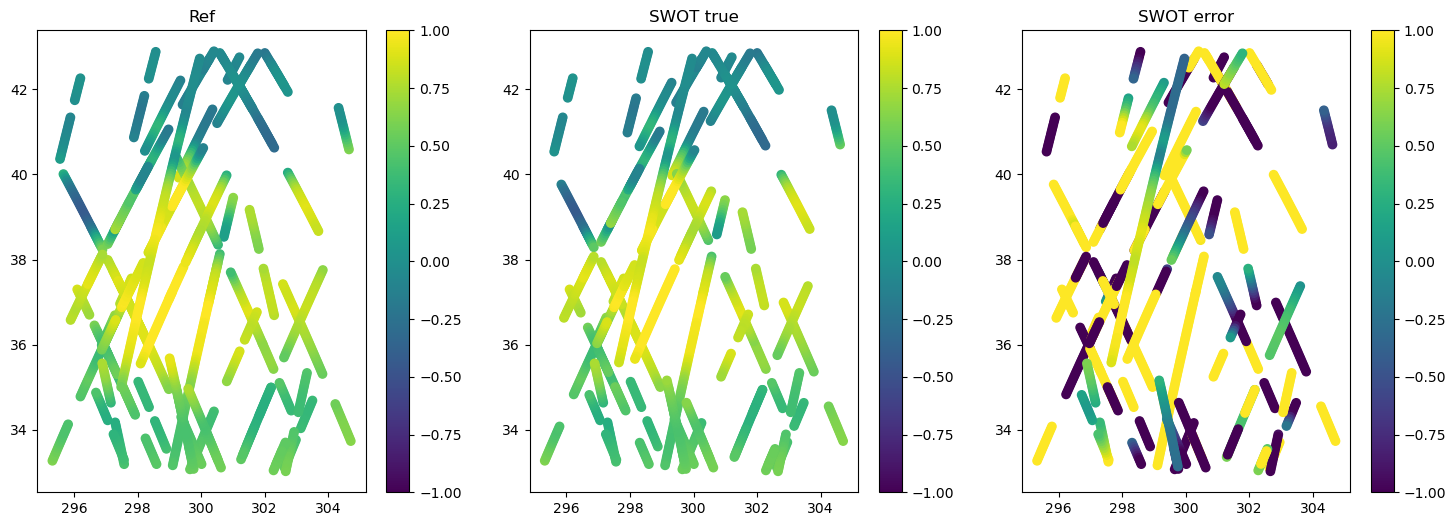

In [5]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.scatter(lonalong,latalong,c=refalong,vmin=-1,vmax=1)
plt.title('Ref')
plt.colorbar() 

plt.subplot(132)
plt.scatter(lonalong,latalong,c=sshalong_true,vmin=-1,vmax=1)
plt.title('SWOT true')
plt.colorbar() 

plt.subplot(133)
plt.scatter(lonalong,latalong,c=sshalong_err,vmin=-1,vmax=1)
plt.title('SWOT error')
plt.colorbar() 

plt.show()

<div class="alert alert-info" role="alert">

<h2>3. Interpolating SWOT calibrated data to evaluate </h2>

</div>

# Interpolating calibration

In [10]:
dir_of_swottracks = '../results/calib_Projmethod/' 
swottracks_type = 'calib' 

_,_,_,_,_,sshalong_calib = interp_swot2nadir(sats, dir_of_swottracks, swottracks_type, nremoval,ref_nadir='model')


dc_SWOTcalibGS_input_pass02.nc
dc_SWOTcalibGS_input_pass03.nc
dc_SWOTcalibGS_input_pass04.nc
dc_SWOTcalibGS_input_pass05.nc
dc_SWOTcalibGS_input_pass06.nc
dc_SWOTcalibGS_input_pass07.nc
dc_SWOTcalibGS_input_pass12.nc
dc_SWOTcalibGS_input_pass13.nc
dc_SWOTcalibGS_input_pass14.nc
dc_SWOTcalibGS_input_pass15.nc
dc_SWOTcalibGS_input_pass16.nc
dc_SWOTcalibGS_input_pass17.nc
dc_SWOTcalibGS_input_pass22.nc
dc_SWOTcalibGS_input_pass23.nc
dc_SWOTcalibGS_input_pass24.nc
dc_SWOTcalibGS_input_pass25.nc
dc_SWOTcalibGS_input_pass26.nc
dc_SWOTcalibGS_input_pass27.nc
dc_SWOTcalibGS_input_pass32.nc
dc_SWOTcalibGS_input_pass33.nc
dc_SWOTcalibGS_input_pass34.nc
dc_SWOTcalibGS_input_pass35.nc
dc_SWOTcalibGS_input_pass36.nc
dc_SWOTcalibGS_input_pass37.nc


# Plotting projection on available nadir tracks in the region

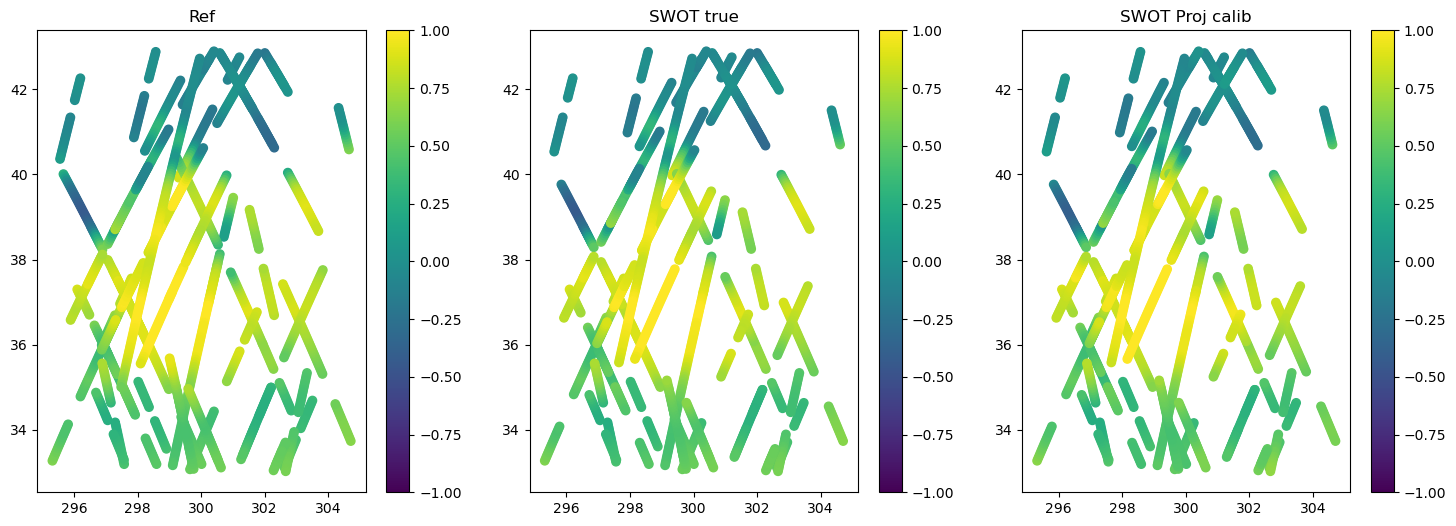

In [11]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.scatter(lonalong,latalong,c=refalong,vmin=-1,vmax=1)
plt.title('Ref')
plt.colorbar() 

plt.subplot(132)
plt.scatter(lonalong,latalong,c=sshalong_true,vmin=-1,vmax=1)
plt.title('SWOT true')
plt.colorbar() 

plt.subplot(133)
plt.scatter(lonalong,latalong,c=sshalong_calib,vmin=-1,vmax=1)
plt.title('SWOT Proj calib')
plt.colorbar() 

plt.show()

<div class="alert alert-info" role="alert">

<h2>4. Along track point-wise errors </h2>

</div>

 # Plotting point-wise error on the nadir tracks

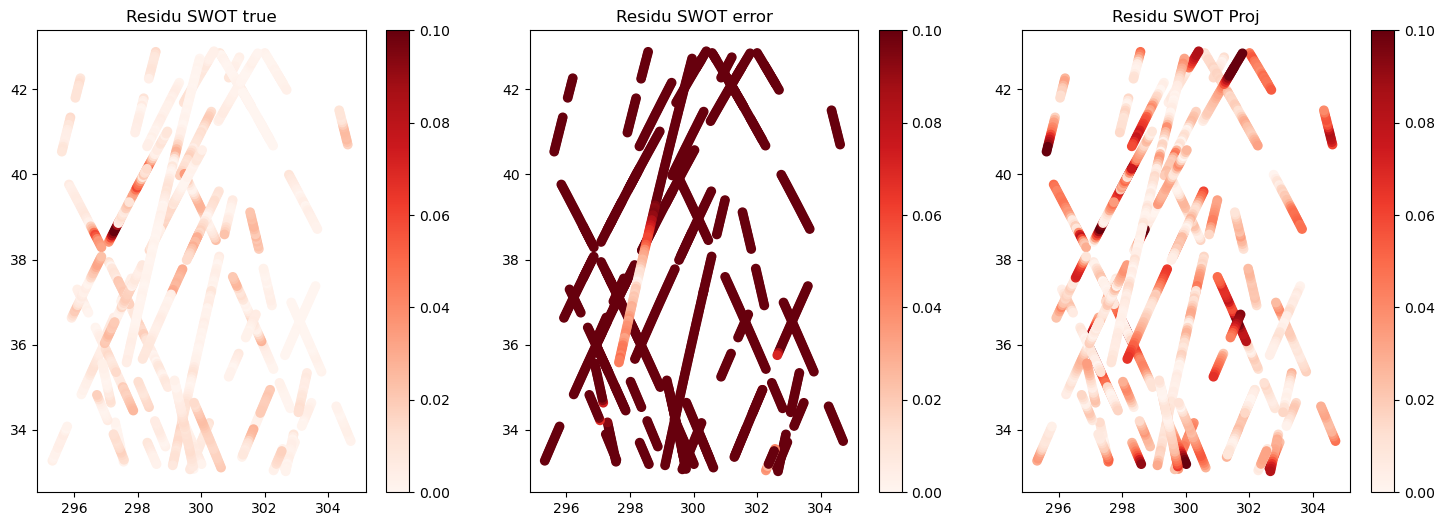

In [12]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.scatter(lonalong,latalong,c=np.sqrt((refalong-sshalong_true)**2),vmin=0,vmax=0.1,cmap='Reds')
plt.title('Residu SWOT true')
plt.colorbar() 

plt.subplot(132)
plt.scatter(lonalong,latalong,c=np.sqrt((refalong-sshalong_err)**2),vmin=0,vmax=0.1,cmap='Reds')
plt.title('Residu SWOT error')
plt.colorbar() 

plt.subplot(133)
plt.scatter(lonalong,latalong,c=np.sqrt((refalong-sshalong_calib)**2),vmin=0,vmax=0.1,cmap='Reds')
plt.title('Residu SWOT Proj')
plt.colorbar() 

plt.show()

# RMSE along tracks

In [13]:

print('RMSE SWOT true:',np.sqrt(np.nanmean( (refalong-sshalong_true)**2 ) ))

print('RMSE SWOT error:',np.sqrt(np.nanmean( (refalong-sshalong_err)**2 ) ))

print('RMSE SWOT Proj:',np.sqrt(np.nanmean( (refalong-sshalong_calib)**2 ) ))


RMSE SWOT true: 0.012959922162290178
RMSE SWOT error: 4.041269790275009
RMSE SWOT Proj: 0.03681290026336


# RMSE in function of across track position

In [14]:
nac = 121

rmse_true_ac = np.zeros(nac)
rmse_err_ac = np.zeros(nac)
rmse_cal_ac = np.zeros(nac)
norm_ac = np.zeros(nac)

for i in range(np.shape(refalong)[0]):
    if ~np.isnan(np.round(x_acalong[i]) ) and ~np.isnan(refalong[i]) and ~np.isnan(sshalong_true[i]):
         
            rmse_true_ac[int(nac/2+np.round(x_acalong[i]))] += (refalong[i]-sshalong_true[i])**2
            rmse_err_ac[int(nac/2+np.round(x_acalong[i]))] += (refalong[i]-sshalong_err[i])**2
            rmse_cal_ac[int(nac/2+np.round(x_acalong[i]))] += (refalong[i]-sshalong_calib[i])**2
            norm_ac[int(nac/2+np.round(x_acalong[i]))] += 1 
            
            if np.round(x_acalong[i])==-60: 
                print(sshalong_true[i])
        
rmse_true_ac = np.sqrt(rmse_true_ac/norm_ac)
rmse_err_ac = np.sqrt(rmse_err_ac/norm_ac)
rmse_cal_ac = np.sqrt(rmse_cal_ac/norm_ac)

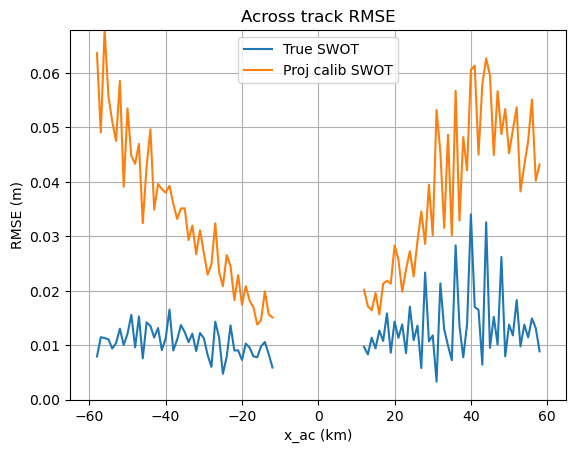

In [17]:
plt.title('Across track RMSE')
plt.plot(range(-60,61),rmse_true_ac,label='True SWOT')
plt.plot(range(-60,61),rmse_cal_ac,label='Proj calib SWOT')
plt.legend()
plt.xlabel('x_ac (km)')
plt.ylabel('RMSE (m)')
plt.grid()
plt.axis([-65,65,0,np.nanmax(rmse_cal_ac)])
plt.show()

<div class="alert alert-info" role="alert">

<h2>5. Along track spectrum </h2>

</div>

# Computing continuous segments

In [18]:
lon_segment, lat_segment, ref_segment, true_segment, npt= compute_segment_alongtrack(timealong, 
                               latalong, 
                               lonalong, 
                               refalong, 
                               sshalong_true, 
                               50,
                               2,
                               7)

In [19]:
lon_segment, lat_segment, ref_segment, err_segment, npt= compute_segment_alongtrack(timealong, 
                               latalong, 
                               lonalong, 
                               refalong, 
                               sshalong_err, 
                               50,
                               2,
                               7)

In [20]:
lon_segment, lat_segment, ref_segment, cal_segment, npt= compute_segment_alongtrack(timealong, 
                               latalong, 
                               lonalong, 
                               refalong, 
                               sshalong_calib, 
                               50,
                               2,
                               7)

# Computing the power spectrum densities

In [21]:
import scipy.signal

global_wavenumber, global_psd_ref = scipy.signal.welch(np.asarray(ref_segment).flatten(),
                                                           fs=1.0 / 2,
                                                           nperseg=npt,
                                                           scaling='density',
                                                           noverlap=0)

global_wavenumber, global_psd_true = scipy.signal.welch(np.asarray(true_segment).flatten(),
                                                           fs=1.0 / 2,
                                                           nperseg=npt,
                                                           scaling='density',
                                                           noverlap=0)

_, global_psd_err = scipy.signal.welch(np.asarray(err_segment).flatten(),
                                             fs=1.0 / 2,
                                             nperseg=npt,
                                             scaling='density',
                                             noverlap=0)


_, global_psd_cal = scipy.signal.welch(np.asarray(cal_segment).flatten(),
                                             fs=1.0 / 2,
                                             nperseg=npt,
                                             scaling='density',
                                             noverlap=0)

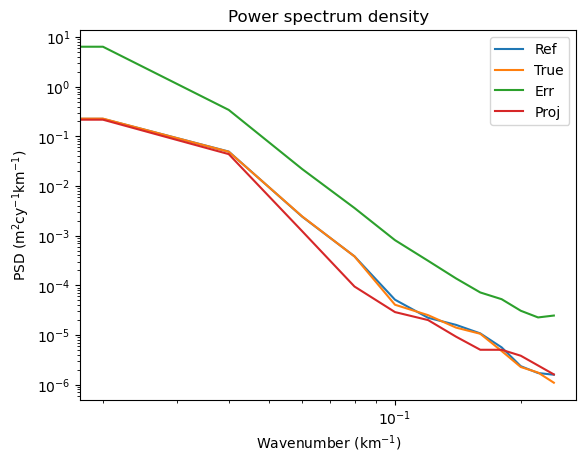

In [22]:
plt.title('Power spectrum density')
plt.xlabel('Wavenumber (km$^{-1}$)')
plt.ylabel('PSD (m$^2$cy$^{-1}$km$^{-1}$)')
plt.loglog(global_wavenumber, global_psd_ref,label='Ref')
plt.loglog(global_wavenumber, global_psd_true,label='True')
plt.loglog(global_wavenumber, global_psd_err,label='Err')
plt.loglog(global_wavenumber, global_psd_cal,label='Proj')
plt.legend()
plt.show()

# Computing the noise-to-signal ratio

In [25]:


global_wavenumber, global_psd_difftrue = scipy.signal.welch((np.array(ref_segment)-np.array(true_segment)).flatten(),
                                                           fs=1.0 / 2,
                                                           nperseg=npt,
                                                           scaling='density',
                                                           noverlap=0,
                                                           detrend=False)

_, global_psd_differr = scipy.signal.welch((np.array(ref_segment)-np.array(err_segment)).flatten(),
                                             fs=1.0 / 2,
                                             nperseg=npt,
                                             scaling='density',
                                             noverlap=0,
                                             detrend=False)


_, global_psd_diffcal = scipy.signal.welch((np.array(ref_segment)-np.array(cal_segment)).flatten(),
                                             fs=1.0 / 2,
                                             nperseg=npt,
                                             scaling='density',
                                             noverlap=0,
                                             detrend=False)

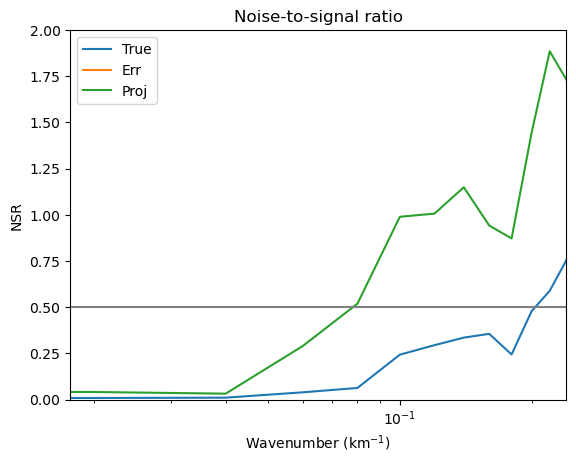

In [26]:
plt.title('Noise-to-signal ratio')
plt.xlabel('Wavenumber (km$^{-1}$)')
plt.ylabel('NSR')
plt.semilogx(global_wavenumber, global_psd_difftrue/global_psd_ref,label='True')
plt.semilogx(global_wavenumber, global_psd_differr/global_psd_ref,label='Err')
plt.semilogx(global_wavenumber, global_psd_diffcal/global_psd_ref,label='Proj')
plt.legend()
plt.plot([np.min(global_wavenumber),np.max(global_wavenumber)],[0.5,0.5],'grey')
plt.axis([np.min(global_wavenumber),np.max(global_wavenumber),0,2])
plt.show()